# Solving the Poisson Equation

The finite element method is a numerical method for solving partial differential equations approximately. A typical example is the Poisson equation:

$$
-\Delta u(x) = f(x) \quad \forall \, x \in \Omega
$$

The right hand side $f$ is a given function, and we search for the solution $u$. The domain $\Omega$ is a subset of ${\mathbb R}^d$. The Poisson equation is a model for many physical phenomena:
* f can be a heat source distribution, and u is the temperature
* f can be an electric charge distribution, and u is the electrostatic potential

To select a unique solution $u$ we have to specify boundary conditions, for example homogeneous Dirichlet boundary conditions

$$
u(x) = 0 \quad \forall \, x \in \partial \Omega
$$

Weak formulation
---
We derive the weak formulation (also called variational formulation) of the Poisson equation. The formulation above is called the strong form. The weak form is the starting point for the finite element discretization method.

First, we multiply the Poisson equation by a so called test function. It is an arbitrary function, some restriction will be given later as needed. We multiply the strong form by the function v:

$$
- \Delta u(x) v(x) = f(x) v(x) \qquad \forall x \in \Omega
$$

We integrate over the domain $\Omega$:

$$
- \int_\Omega \Delta u(x) v(x) dx = \int_\Omega f(x) v(x) dx
$$

From Gauss' Theorem $\int_\Omega \operatorname{div} b \, dx = \int_{\partial \Omega} n\cdot b \, ds$ applied to the vector field $b = \nabla u v$ we obtain

$$
\int_{\partial \Omega} n \nabla u \, v \, ds = \int_\Omega \operatorname{div} (\nabla u \, v) \, dx
= \int_{\Omega} \Delta u v + \nabla u \nabla v \, dx.
$$

This allows us to rewrite the left hand side such that

$$
\int_\Omega \nabla u \nabla v \, dx - \int_{\partial \Omega} \frac{\partial u}{\partial n} v \, ds = \int_\Omega f v \, dx
$$

In the case of Dirichlet boundary conditions we allow only test-functions $v$ such that $v(x) = 0$ on the boundary $\partial \Omega$.

We have derived the weak form: find $u$ such that $u = 0$ on $\partial \Omega$ and 

$$
\int_\Omega \nabla u \nabla v \, dx = \int_\Omega f v \, dx
$$

holds true for all test-functions $v$ with $v = 0$ on $\partial \Omega$. Note that the weak formulation needs only first order derivatives of $u$ and $v$, in contrast to the strong form which requires second order derivatives of $u$.

## The Sobolev space $H^1$, linear and bilinear forms


The proper space to search for the solution is the so called Sobolev space 

$$
H^1(\Omega) := \{ u \in L_2(\Omega) : \nabla u \in L_2(\Omega)^d \}
$$

The super-script $1$ indicates that we want to have first order derivatives in $L_2$. We just note that the derivative is understood in weak sense, which is well defined for functions with kinks. The vector space $H^1$ comes with the norm

$$
\| u \|_{H^1}^2 := \| u \|_{L_2}^2 + \| \nabla u \|_{L_2}^2
$$

and the inner product

$$
(u,v)_{H^1} = (u,v)_{L_2} + (\nabla u, \nabla v)_{L_2}.
$$

It is a complete space with an inner product what is called a Hilbert space.



It does not make sense to take boundary values of $L_2$-functions. The so called trace theorem tells us that boundary values of $H^1$ functions are well defined:

$$
u_{|\partial \Omega} \in L_2(\partial \Omega)
$$

Thus it makes sense to define the sub-space satisfying homogeneous Dirichlet boundary conditions

$$
H_0^1(\Omega) = \{ u \in H^1(\Omega) : u_{|\partial \Omega} = 0 \} 
$$

Let us consider the term on the left hand side of the variational formulation:

$$
A(u,v) := \int_{\Omega} \nabla u \nabla v \, dx
$$


For given functions $u$ and $v$ from the Sobolev space, we compute the number $\int \nabla u \nabla v \, dx$. Thus, $A(.,.)$ is a function mapping from two elements from $H^1$ into ${\mathbb R}$:

$$
A(.,.) : H^1 \times H^1 \rightarrow {\mathbb R}
$$

The function $A(.,.)$ is linear in both arguments, and thus we call it a bilinear-form.


Similarly, the right hand side

$$
f(v) := \int_{\Omega} f v \, dx
$$

is a linear function

$$
f(.) : H^1 \rightarrow {\mathbb R},
$$

which we call a linear form. We use the same symbol for the function 
$f : \Omega \rightarrow {\mathbb R}$ and the linear-form $f : H^1(\Omega) \rightarrow {\mathbb R}$.

Having these objects defined, the weak formulation reads now 

$$
\text{find} \, u \in H_0^1 : \quad A(u,v) = f(v) \quad \forall \, v \in H_0^1
$$

This abstract formalism in Hilbert spaces, bilinear and linear forms apply for a large class of (elliptic) partial differential equations.

The Finite Element Method
--
The weak formulation is the starting point for the finite element method. We cannot compute the solution in an infinite dimensional Hilbert space. But, we can define a finite dimensional sub-space 

$$
V_h \subset H^1_0
$$

and restrict the weak formulation to $V_h$:

$$
\text{find} \, u_h \in V_h : \quad A(u_h,v_h) = f(v_h) \quad \forall \, v_h \in V_h
$$

This is called the Galerkin method. The finite element solution $u_h$ is some approximation to the true solution $u$. We will analyze the discretization error $\| u - u_h \|_{H^1}$.

For computing the discrete solution $u_h$ we have to choose a basis for the function space $V_h$, where $N = \operatorname{dim} V_h$

$$
V_h = \operatorname{span} \{ p_1(x), \ldots, p_N(x) \}
$$

By means of this basis we can expand the solution $u_h$ as

$$
u_h(x) = \sum_{i=1}^N u_i p_i(x)
$$

The coefficients $u_i$ are combined to the coefficient vector $u = (u_1, \ldots, u_N) \in {\mathbb R}^N$.

Instead of testing with all test-functions from $V_h$, by linearity of $A(.,.)$ and $f(.)$, it is enough to test only with the basis functions $p_j(x), j = 1, \ldots, N$

Thus, the finite element problem can be rewritten as

$$
\text{find } u \in {\mathbb R}^N : \quad A(\sum_i u_i p_i, p_j) = f(p_j) \qquad \forall \, j = 1, \ldots N
$$

By linearity of $A(.,.)$ in the first argument we can write

$$
\text{find } u \in {\mathbb R}^N : \quad \sum_{i=1}^N A(p_i, p_j) \, u_i = f(p_j) \qquad \forall \, j = 1, \ldots N
$$

Since the basis functions are known, we can compute the matrix $A \in {\mathbb R}^{N\times N}$ with entries

$$
A_{j,i} = A(p_i,p_j) = \int_\Omega \nabla p_i(x) \nabla p_j(x) \, dx
$$

and the vector $f \in {\mathbb R}^N$ as

$$
f_j = f(p_j) = \int_\Omega f(x) p_j(x) \, dx
$$

Solving the finite element problem results in the linear system of equations for the coefficient vector $u = (u_1, \ldots, u_N)$:

$$
\text{find } u \in {\mathbb R}^N : \quad A u = f
$$

By means of the coefficient vector, we have a representation of the finite element solution 

$$
u_h(x) = \sum_{i=1}^N u_i p_i(x)
$$

Poisson equation in NGSolve:
--
The Python interface to NGSolve allows us to enter the equation very close to its mathematical formulation.

In [4]:
# load Netgen/NGSolve 
from ngsolve import *
from ngsolve.webgui import Draw

The unit-square $\Omega = (0,1)^2$ is a predefined domain in NGSolve:

In [9]:
Draw(unit_square.shape)

We generate a mesh (also called a triangulation) for $\Omega$ of mesh-size $h=0.2$:

In [8]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.2))
Draw (mesh)

Number of vertices and elements:

In [7]:
mesh.nv, mesh.ne

(38, 54)

define the finite element space (dof is short for degree of freedom): 

In [5]:
fes = H1(mesh, order=3, dirichlet=".*")
print ("number of dofs =", fes.ndof)

number of dofs = 274


Define the bilinear-form. We define it by means of trial- and test-functions of the space:

In [6]:
u = fes.TrialFunction()
v = fes.TestFunction()
a = BilinearForm(grad(u)*grad(v)*dx)

Similarly, we define the linear-form. The function `funcf` is defined by means of `x` and `y`, which are pre-defined symbols for Cartesian coordinates:

In [7]:
funcf = 50*x*y
f = LinearForm(funcf*v*dx)

compute the matrix and right hand side vector:

In [8]:
a.Assemble()
f.Assemble();

solve the linear system. Restrict the set of basis functions to non-Dirichlet basis functions (freedofs):

In [9]:
gfu = GridFunction(fes)
gfu.vec.data = a.mat.Inverse(freedofs=fes.FreeDofs()) * f.vec
Draw (gfu);

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

In [10]:
Draw (grad(gfu), mesh, order=3, vectors = True);

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

We can inspect the matrix entries. Either directly printing the matrix, or convert the sparse matrix to scipy:

In [11]:
# (i,j,val) = a.mat.COO()
# print (list(i),list(j),list(val))
# print (a.mat)
from scipy.sparse import csr_matrix
print (csr_matrix(a.mat.CSR()))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4282 stored elements and shape (274, 274)>
  Coords	Values
  (0, 0)	0.9999999999999968
  (0, 4)	-0.49999999999999956
  (0, 19)	-0.4999999999999972
  (0, 38)	-0.08333333333333291
  (0, 39)	-2.654126918244515e-16
  (0, 40)	-0.08333333333333313
  (0, 41)	-3.2612801348363973e-16
  (0, 58)	0.16666666666666613
  (0, 59)	-4.5102810375396984e-17
  (0, 220)	-5.551115123125783e-17
  (1, 1)	0.9999999999999961
  (1, 7)	-0.49999999999999745
  (1, 8)	-0.49999999999999856
  (1, 42)	-0.08333333333333297
  (1, 43)	-3.191891195797325e-16
  (1, 44)	-0.08333333333333294
  (1, 45)	-2.6107588313450947e-16
  (1, 74)	0.16666666666666596
  (1, 75)	4.5102810375396984e-17
  (1, 226)	-5.551115123125783e-17
  (2, 2)	0.9999999999999961
  (2, 11)	-0.49999999999999745
  (2, 12)	-0.49999999999999856
  (2, 46)	-0.08333333333333297
  (2, 47)	-3.191891195797325e-16
  :	:
  (271, 206)	-0.0019075882630131013
  (271, 207)	-0.0003246264330742576
  (271, 218)	-0.00

the right hand side vector:

In [12]:
import numpy as np
print (np.array(f.vec))

[ 6.66666667e-04  1.60000000e-02  3.00666667e-01  2.50316962e-02
  1.53787128e-02  3.19680983e-02  3.64215571e-02  6.01137796e-02
  2.58401058e-01  3.41500143e-01  4.64175433e-01  7.54078336e-01
  9.65054998e-01  5.02685745e-01  3.65223563e-01  1.45178183e-01
  2.63488409e-02  3.03868260e-02  3.09439654e-02  1.51827952e-02
  1.57438188e-01  1.96522377e-01  2.73642628e-01  5.02716675e-01
  7.00784377e-01  1.07203103e+00  7.84223105e-01  8.62882720e-01
  4.14109207e-01  1.25387779e-01  1.78478512e-01  1.86485696e-01
  3.60521663e-01  3.18641431e-01  6.87560986e-01  4.04987970e-01
  3.88160967e-01  5.00017631e-01 -1.11111111e-04 -1.58730159e-05
 -1.11111111e-04 -1.58730159e-05 -1.55555556e-03  1.58730159e-05
 -3.22222222e-03 -5.39682540e-04 -3.67777778e-02  5.39682540e-04
 -3.67777778e-02  5.39682540e-04 -2.94583153e-03 -3.71057295e-04
 -6.65714424e-04  7.14041600e-06 -3.85020635e-03 -4.30399229e-04
 -6.77560317e-04 -2.31247349e-05 -1.12348111e-03  4.69889843e-07
 -2.59956630e-03 -4.04715

and the solution vector:

In [13]:
print (np.array(gfu.vec))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.95604147e-01  4.15960317e-01  3.90617436e-01  6.05046764e-01
  7.39473079e-01  7.67810331e-01  7.89973079e-01  8.32999355e-01
  4.92246882e-01  1.93740634e-01  3.63451645e-01  4.08449548e-01
  7.65881651e-01  6.89386988e-01  1.04654230e+00  7.52519575e-01
  9.49056407e-01  9.82901183e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.29872146e-01 -5.63346048e-02
  0.00000000e+00  0.00000000e+00 -4.42881775e-01  9.31354352e-06
  4.75238124e-02 -1.66538

## Visualizing the basis functions

For a finite element space of order=1, the basis-functions are associated with mesh vertices. For higher order, we also have edge and face based basis-functions. 

Let's have a look at the basis functions. Well know are the so-called hat-functions, which have value 1 in one vertex, 0 in all other, and a linear interpolation in between.

Open controls, and use the `multidim` slider to select basis function

In [14]:
gf = GridFunction(fes, multidim=mesh.nv)
for i in range (mesh.nv):
    gf.vecs[i][:] = 0
    gf.vecs[i][i] = 1
scene = Draw (gf, mesh, deformation=True, animate=True, scale=0.3, euler_angles=[-65,-18,-45]);

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {'camera': {'euler_angles': […

For higher order spaces there are also basis functions on edges:

In [15]:
edgedofs = fes.GetDofNrs(NodeId(EDGE,40))
print ("dofs on edge #40: ", edgedofs)

gf = GridFunction(fes)
for edof in edgedofs:
    gf.vec[:] = 0
    gf.vec[edof] = 1
    Draw (-3*gf, mesh, deformation=True, order=3)

dofs on edge #40:  (118, 119)


WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

and also basis functions associated with faces:

In [16]:
facedofs = fes.GetDofNrs(NodeId(FACE,0))
print ("dofs on face #0: ", facedofs)

for fdof in facedofs:
    gf.vec[:] = 0
    gf.vec[fdof] = 1  
    Draw (5*gf, mesh, deformation=True, order=3)

dofs on face #0:  (220,)


WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

To get help on types or objects use the help function:

In [17]:
help (Mesh)

Help on class Mesh in module ngsolve.comp:

class Mesh(pybind11_builtins.pybind11_object)
 |  NGSolve interface to the Netgen mesh. Provides access and functionality
 |  to use the mesh for finite element calculations.
 |
 |  Parameters:
 |
 |  mesh (netgen.Mesh): a mesh generated from Netgen
 |
 |  Method resolution order:
 |      Mesh
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  BBBoundaries(...)
 |      BBBoundaries(self: ngsolve.comp.Mesh, pattern: str) -> ngsolve.comp.Region
 |
 |      Return co dim 3 boundary mesh-region matching the given regex pattern
 |
 |  BBoundaries(...)
 |      BBoundaries(self: ngsolve.comp.Mesh, pattern: str) -> ngsolve.comp.Region
 |
 |      Return co dim 2 boundary mesh-region matching the given regex pattern
 |
 |  Boundaries(...)
 |      Boundaries(*args, **kwargs)
 |      Overloaded function.
 |
 |      1. Boundaries(self: ngsolve.comp.Mesh, pattern: str) -> ngsolve.comp.Region
 |
 |      Retu

In [18]:
help (fes)

Help on H1 in module ngsolve.comp object:

class H1(FESpace)
 |  An H1-conforming finite element space.
 |
 |  The H1 finite element space consists of continuous and
 |  element-wise polynomial functions. It uses a hierarchical (=modal)
 |  basis built from integrated Legendre polynomials on tensor-product elements,
 |  and Jaboci polynomials on simplicial elements.
 |
 |  Boundary values are well defined. The function can be used directly on the
 |  boundary, using the trace operator is optional.
 |
 |  The H1 space supports variable order, which can be set individually for edges,
 |  faces and cells.
 |
 |  Internal degrees of freedom are declared as local dofs and are eliminated
 |  if static condensation is on.
 |
 |  The wirebasket consists of all vertex dofs. Optionally, one can include the
 |  first (the quadratic bubble) edge basis function, or all edge basis functions
 |  into the wirebasket.
 |
 |  Keyword arguments can be:
 |
 |  order: int = 1
 |    order of finite element 

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

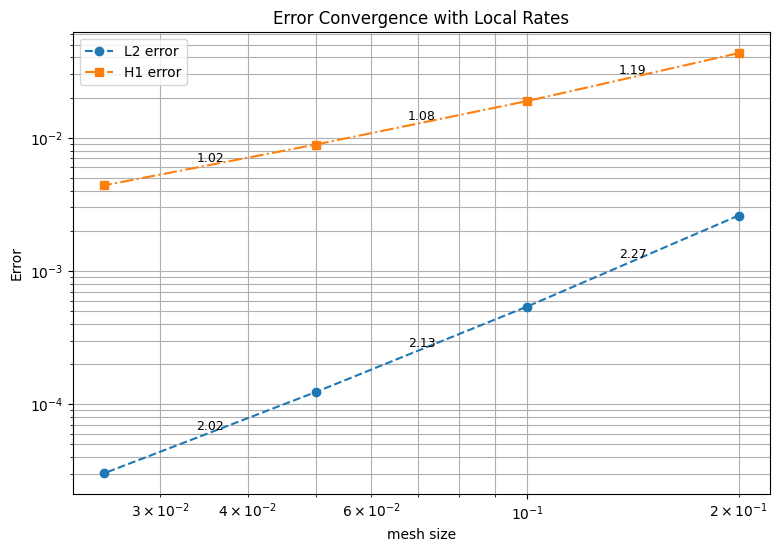

In [19]:
# interpolation
uex = CF( (1-x)*x*(1-y)*y) 
graduex = CF( (uex.Diff(x), uex.Diff(y) ))

gfu.Set(uex, dual = True) # performs standard Lagrange interpolation


Draw(gfu, mesh)
errL2 = []
errH1 = []
h = []

for i in range(4):
    h.append( 0.2 / ( 2**i) )
    mesh = Mesh(unit_square.GenerateMesh(maxh=h[-1]))
    fes = H1(mesh, order = 1)
    gfu = GridFunction(fes)
    gfu.Set(uex, dual = True)
    errL2.append (sqrt( Integrate( (gfu - uex)**2, mesh)))
    errH1.append( sqrt( Integrate( (grad(gfu) - graduex)**2, mesh)))

import numpy as np

def compute_rates(err_vec, nel_vec):
    rates = []
    for i in range(len(nel_vec)-1):
        r = np.log(err_vec[i] / err_vec[i+1]) / np.log(h[i] / h[i+1])
        rates.append(r)
    return rates

rates_L2 = compute_rates(errL2, h)
rates_H1 = compute_rates(errH1, h)

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Plot errors
plt.loglog(h, errL2, marker="o", linestyle="--", label="L2 error")
plt.loglog(h, errH1, marker="s", linestyle="-.", label="H1 error")


# Annotate convergence rates
def annotate_rates(nel_vec, err_vec, rates, y_offset=0):
    for i in range(len(rates)):
        x_mid = np.sqrt(nel_vec[i] * nel_vec[i+1])
        y_mid = np.sqrt(err_vec[i] * err_vec[i+1])
        plt.text(x_mid, y_mid*(1+y_offset), f"{rates[i]:.2f}", fontsize=9, ha="center")

annotate_rates(h, errL2, rates_L2, y_offset=0.05)
annotate_rates(h, errH1, rates_H1, y_offset=0.05)


plt.xlabel("mesh size")
plt.ylabel("Error")
plt.title("Error Convergence with Local Rates")
plt.legend()
plt.grid(True, which="both")

plt.show()




